# Shift the islands to provide more room to move

As [Perry](https://github.com/pe-perry) request to have larger room to edit and move the region, the following steps are done in this notebook.

 1. Move all region up for 6 units
 2. Move the regions inside *Kownloon* and *New Territories* up for 4 units
 
The input file `save_cache.geojson` is the edited map file.
The grid file `wgs84_map_grid.geojson` is the base grid converted into **WGS** format.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

from shapely.geometry import Polygon, Point
from pyproj import Proj, transform
import matplotlib.pyplot as plt

In [2]:
from hexMap import hexMap

In [3]:
wgs_hex = hexMap('save_cache.geojson', 'wgs84_map_grid.geojson', 800)

In [4]:
result = wgs_hex.get_geoPandas()

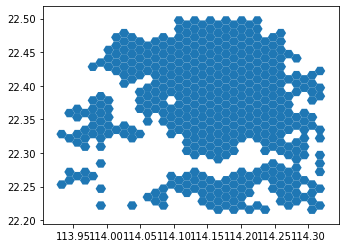

In [5]:
result.plot()
plt.show()

In [6]:
result.head()

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry
0,B11,Stubbs Road,Stubbs Road,B,0,1,114.177589,21,22.234363,3,"POLYGON ((114.1853488430469 22.23436281004801,..."
1,B10,Happy Valley,Happy Valley,B,1,1,114.189229,22,22.240619,4,"POLYGON ((114.1969898613751 22.24061842527246,..."
2,B09,Broadwood,Broadwood,B,2,1,114.189228,22,22.228106,2,"POLYGON ((114.1969880712882 22.22810513665774,..."
3,B08,Jardine's Lookout,Jardine's Lookout,B,3,1,114.200869,23,22.234361,3,"POLYGON ((114.2086290884208 22.23435992355751,..."
4,B07,Tai Hang,Tai Hang,B,4,1,114.200871,23,22.246875,5,"POLYGON ((114.2086319127874 22.24687320148782,..."


In [7]:
result['selected'] = 0

In [8]:
result[result['CACODE'].isin(['E01', 'A01'])]

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry,selected
40,A01,Chung Wan,Chung Wan,A,40,1,114.154305,19,22.259388,7,"POLYGON ((114.1620659745603 22.25938890326026,...",0
119,E01,Tsim Sha Tsui West,Tsim Sha Tsui West,E,119,1,114.131008,17,22.296923,13,"POLYGON ((114.1387714350405 22.29692477873069,...",0


In [9]:
result_sorted = result.sort_values(['xid', 'yid'], ascending=[False, False]).copy()

In [10]:
for _, items in result_sorted.iterrows():
    temp_result = wgs_hex.swap_position(items.xid, items.yid, items.xid, (items.yid + 6))
    if not temp_result:
        print (items)

In [11]:
result_sorted['selected'] = np.where(result_sorted.district.isin(['E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S']), 1, 0)

In [12]:
current = wgs_hex.get_geoPandas()
current['selected'] = np.where(current.CACODE.isin(['E01', 'A01']), 1, 0)
current[current.selected == 1]

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry,selected
40,A01,Chung Wan,Chung Wan,A,40,1,114.046247,19,22.219673,13,"POLYGON ((114.0540062923316 22.21967943232229,...",1
119,E01,Tsim Sha Tsui West,Tsim Sha Tsui West,E,119,1,114.022928,17,22.257193,19,"POLYGON ((114.0306896163206 22.2571999216151, ...",1


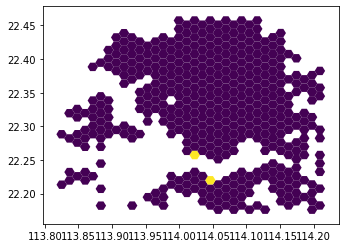

In [13]:
current.plot(column='selected')
plt.show()

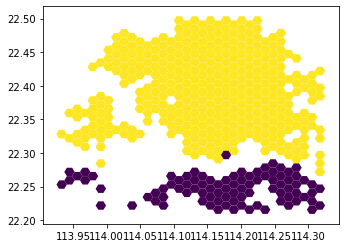

In [14]:
result_sorted.plot(column='selected')
plt.show()

In [15]:
result_sorted['yid'] = result_sorted['yid'] + 6

In [16]:
result_sorted[result_sorted['CACODE'].isin(['E01', 'A01'])]

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry,selected
40,A01,Chung Wan,Chung Wan,A,40,1,114.154305,19,22.259388,13,"POLYGON ((114.1620659745603 22.25938890326026,...",0
119,E01,Tsim Sha Tsui West,Tsim Sha Tsui West,E,119,1,114.131008,17,22.296923,19,"POLYGON ((114.1387714350405 22.29692477873069,...",1


In [17]:
for _, items in result_sorted[result_sorted['selected'] == 1].iterrows():
    try:
        wgs_hex.swap_position(items.xid, items.yid, items.xid, (items.yid + 4))
    except Exception as e:
        print(_, items)
        raise Exception(e)
        

In [18]:
result_sorted.head()

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry,selected
448,Q03,Sai Kung Islands,Sai Kung Islands,Q,448,1,114.317458,33,22.421999,39,"POLYGON ((114.3252285300644 22.42199206381812,...",1
442,Q19,Yan Ying,Yan Ying,Q,442,1,114.317433,33,22.396973,35,"POLYGON ((114.3252019602988 22.3969661051084, ...",1
438,Q22,King Lam,King Lam,Q,438,1,114.317420,33,22.384460,33,"POLYGON ((114.3251886874612 22.38445309750463,...",1
429,Q12,Fu Kwan,Fu Kwan,Q,429,1,114.317370,33,22.334408,25,"POLYGON ((114.3251356855549 22.33440087564772,...",1
428,Q13,O Tong,O Tong,Q,428,1,114.317358,33,22.321895,23,"POLYGON ((114.3251224593469 22.32188777167416,...",1


In [19]:
check_wgs = gpd.read_file('wgs84_map_grid.geojson')

In [20]:
current = wgs_hex.get_geoPandas()
current['selected'] = np.where(current.CACODE.isin(['E01', 'A01']), 1, 0)
current[current.selected == 1]

,CACODE,CNAME,ENAME,district,id,seat,x,xid,y,yid,geometry,selected
40,A01,Chung Wan,Chung Wan,A,40,1,114.046247,19,22.219673,13,"POLYGON ((114.0540062923316 22.21967943232229,...",1
119,E01,Tsim Sha Tsui West,Tsim Sha Tsui West,E,119,1,114.022901,17,22.282219,23,"POLYGON ((114.0306636227229 22.28222630834234,...",1


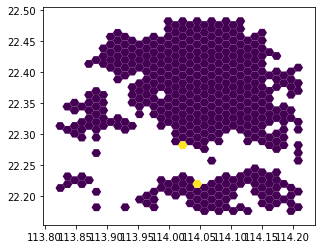

In [21]:
current.plot(column='selected')
plt.show()

In [22]:
check_wgs[(check_wgs['xid'] == 27) & (check_wgs['yid'] == 13)]

,xid,yid,id,geometry
5872,27,13,"(27, 13)",POINT (114.1393582260006 22.21972147114739)


In [23]:
with open('save_cache_move_up.geojson', 'w') as file:
    file.write(wgs_hex.gen_json())